In [1]:
# import libraries
from shutil import copyfile
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from xml.etree import ElementTree
import glob
import os.path, time
import datetime
from tqdm import tqdm_notebook
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import random
from collections import Counter
from random import sample, choices
import cv2
from tqdm.notebook import tqdm
plt.rcParams["figure.figsize"] = [10,10]

In [2]:
# base path for xml
xml_base_path = r"D:\Shoes\Shoes\\"

In [3]:
# annotation files
annotation_files = glob.glob(xml_base_path + "*.xml")
annotation_file_names =[i.split("\\")[-1].split(".")[0] for i in annotation_files]

In [4]:
def check_dim(name):
    name = name
    xml_path =  r"D:\Shoes\Shoes\\" + name + ".xml"
    img = plt.imread(r"D:\Shoes\Shoes_with_annotations\\"  +name + ".jpg")
    soup = BeautifulSoup(open(xml_path).read())
    x_dim = img.shape[1]
    y_dim = img.shape[0]
    x_xml = soup.find_all(["x","xmin","xmax"])
    y_xml = soup.find_all(["y","ymin","ymax"])
    x_txt = [float(i.text) for i in x_xml]
    y_txt = [float(i.text) for i in y_xml]
    ind_x = sum([i for i in x_txt if i > x_dim])
    ind_y = sum([i for i in y_txt if i > y_dim])
    if ((ind_x > 0) or (ind_y >0)):
        return "nf"
    else:
        return name

In [5]:
# uncomment to get data
# catch_images_shoes = Parallel(n_jobs=6, verbose = 10, backend = "threading")(delayed(check_dim)(file) for file in annotation_file_names)

In [6]:
# paths_correct = [i for i in catch_images_shoes if i !="nf"]

In [7]:
# len(paths_correct)

In [8]:
# len([i for i in paths_correct])/len(annotation_files)

In [9]:
def parse_xmls(name): 
    # read the file name
    xml_path =  r"D:\Shoes\Shoes\\" + name + ".xml"
    img = plt.imread(r"D:\Shoes\Shoes_with_annotations\\"  +name + ".jpg")
    width = img.shape[1]
    height = img.shape[0]
    # make soup
    # pass the path to the beautiful soup function
    soup = BeautifulSoup(open(xml_path).read())
    soup_obj = soup.find_all("object")
    catch = []
    for item in range(len(soup_obj)):
        class_name = soup_obj[item].find_all("name")[0].text
        x_pts = [int(round(float(i.text),0)) for i in soup_obj[item].find_all(["x","xmin","xmax"])]
        y_pts = [int(round(float(i.text),0)) for i in soup_obj[item].find_all(["y","ymin","ymax"])]
        xmin = np.min(x_pts)
        ymin = np.min(y_pts)
        xmax = np.max(x_pts)
        ymax = np.max(y_pts)
        catch_obj = {"class": class_name, "xmin":xmin, "ymin":ymin,"xmax":xmax,"ymax":ymax}
        catch_obj["filename"] = name + ".jpg"
        catch_obj["width"] = width
        catch_obj["height"] = height
        catch.append(catch_obj)
    return(catch)
        

In [10]:
# uncomment to get data
# catch_images_shoes = Parallel(n_jobs=6, verbose = 10, backend = "threading")(delayed(parse_xmls)(file) for file in paths_correct)

In [11]:
# uncomment to get data
# catch_images_shoes = [j for i in catch_images_shoes for j in i]

In [12]:
# uncomment to get data
# catch_images_shoes_df = pd.DataFrame(catch_images_shoes)

In [13]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [14]:
# uncomment to get data
# catch_images_shoes_df.to_csv("D:\Shoes\shoe_annotations.csv", index = False)

In [15]:
# uncomment to get data
catch_images_shoes_df = pd.read_csv("D:\Shoes\shoe_annotations.csv")

In [16]:
catch_images_shoes_df.head()

,class,xmin,ymin,xmax,ymax,filename,width,height
0,text,748,303,876,440,acorn-acorn-moc-summerweight-stonewash-black-c...,1907,700
1,text,878,301,962,376,acorn-acorn-moc-summerweight-stonewash-black-c...,1907,700
2,text,884,383,958,462,acorn-acorn-moc-summerweight-stonewash-black-c...,1907,700
3,other,1037,160,1137,271,acorn-acorn-moc-summerweight-stonewash-black-c...,1907,700
4,other,1008,305,1133,424,acorn-acorn-moc-summerweight-stonewash-black-c...,1907,700


In [17]:
# write a function to take an image and plot the box and labels

def plot_rectangles(filename): 
    base_path = r"D:\Shoes\Shoes_with_annotations\\"
    filename = filename
    samp_path = base_path + filename
    samp_image1 = plt.imread(samp_path)
    samp_image = samp_image1.copy()
    temp_data = catch_images_shoes_df[catch_images_shoes_df["filename"] == filename]
    temp_data = temp_data[temp_data["class"] != "exclude"]
    categories = temp_data["class"]
    # get the unique categories
    unique_cat = np.unique(categories)
    unique_cat = [i for i in unique_cat if i != "exclude"]
    for i in unique_cat:
        temp_data_cat = temp_data[temp_data["class"] == i]
        for i1 in temp_data_cat.iterrows(): 
#     print(i)
            xmin, ymin, xmax, ymax = i1[1]["xmin"], i1[1]["ymin"], i1[1]["xmax"], i1[1]["ymax"]
#     samp_image = np.array(samp_image[:,:,::-1])
            cv2.rectangle(samp_image, (xmin, ymin), (xmax, ymax), (255,0,0), 3)
    plt.title("region proposals from humans")
    plt.imshow(samp_image)
    return(temp_data, samp_image,samp_image1)

In [18]:
index = random.sample(set(np.unique(catch_images_shoes_df["filename"])), k = 1)[0]

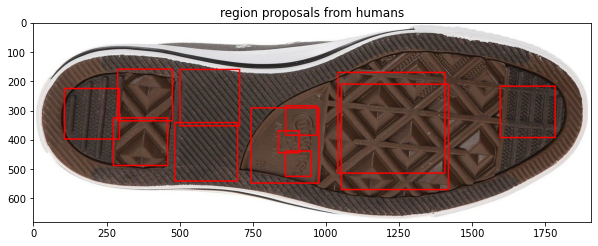

In [19]:
file_details, human_image, og_image = plot_rectangles(index)

In [20]:
# write a function to take an image and plot the box and labels

def store_human_annotated(filename): 
    base_path = r"D:\Shoes\Shoes_with_annotations\\"
    store_path = r"D:\Shoes\Latest_Iteration\Human_Annotated\\"
    filename = filename
    samp_path = base_path + filename
    samp_image1 = plt.imread(samp_path)
    samp_image = samp_image1.copy()
    temp_data = catch_images_shoes_df[catch_images_shoes_df["filename"] == filename]
    temp_data = temp_data[temp_data["class"] != "exclude"]
    categories = temp_data["class"]
    # get the unique categories
    unique_cat = np.unique(categories)
    unique_cat = [i for i in unique_cat if i != "exclude"]
    for i in unique_cat:
        temp_data_cat = temp_data[temp_data["class"] == i]
        for i1 in temp_data_cat.iterrows(): 
#     print(i)
            xmin, ymin, xmax, ymax = i1[1]["xmin"], i1[1]["ymin"], i1[1]["xmax"], i1[1]["ymax"]
#     samp_image = np.array(samp_image[:,:,::-1])
            cv2.rectangle(samp_image, (xmin, ymin), (xmax, ymax), (255,0,0), 3)
#     plt.title("region proposals from humans")
    plt.imsave(store_path + filename,samp_image)
    return(1)

In [21]:
# uncomment following three chunks to get human annotated images

In [22]:
file_names = np.unique(catch_images_shoes_df["filename"])

In [23]:
# _ = store_human_annotated(index)

In [24]:
# _ = Parallel(n_jobs=6, verbose = 10, backend = "threading")(delayed(store_human_annotated)(file) for file in file_names)

In [25]:
file_details

,class,xmin,ymin,xmax,ymax,filename,width,height
5934,star,838,370,910,445,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681
5935,line,502,161,706,353,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681
5936,line,484,342,699,541,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681
5937,quadrilateral,107,226,295,398,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681
5938,"quad,triangle,chevron",289,160,476,336,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681
5939,"quad,triangle,chevron",274,326,460,488,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681
5940,"quadrilateral,line",1597,218,1785,393,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681
5941,text,863,439,951,525,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681
5942,text,864,285,970,385,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681
5943,quadrilateral,1042,171,1408,514,converse-chuck-taylor-all-star-core-ox-charcoa...,1908,681


In [26]:
# base_path = r"D:\Shoes\Shoes_with_annotations\\"
# filename = catch_images_shoes_df["filename"][2356]
# samp_path = base_path + filename
# image = cv2.imread(samp_path)
# ss.setBaseImage(image)

In [27]:
# write a function to get all the region proposals

def get_rpn(filename,method = "quality"): 
    base_path = r"D:\Shoes\Shoes_with_annotations\\"
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    base_path = r"D:\Shoes\Shoes_with_annotations\\"
    filename = filename
    samp_path = base_path + filename
    im = cv2.imread(samp_path)
    ss.setBaseImage(im)
    if method == "fast":
        print(method)
        ss.switchToSelectiveSearchFast()
    if method == "quality":
        print(method)
        ss.switchToSelectiveSearchQuality()
    rects = ss.process()
    coords = []
    for (x, y, w, h) in rects: 
        xmin, ymin, xmax, ymax = x,y,x+w, y+h
        coords.append([xmin, ymin, xmax, ymax])
    return(coords)

In [28]:
coords = get_rpn(index, method = "quality")

quality


In [29]:
robot_dict = []
for i in coords:
    human_annotated_dict = {"x1": i[0], "x2": i[2], 
                       "y1": i[1],"y2": i[3]}
    robot_dict.append(human_annotated_dict)

In [30]:
best_catches = []
max_value_catch = []
for i in file_details[["xmin","ymin","xmax","ymax"]].values:
    human_annotated = i
    human_annotated_dict = {"x1": human_annotated[0], "x2": human_annotated[2], 
                       "y1": human_annotated[1],"y2": human_annotated[3]}
    iou_human_vs_robot = [get_iou(n,human_annotated_dict) for i,n in enumerate(robot_dict)]
    max_value = np.max(iou_human_vs_robot)
    max_value_catch.append(max_value)
    best_rpn = robot_dict[np.argmax(iou_human_vs_robot)]
    xmin, ymin, xmax, ymax = best_rpn["x1"], best_rpn["y1"], best_rpn["x2"], best_rpn["y2"]
    obj = [xmin, ymin, xmax, ymax]
    best_catches.append(obj)

In [31]:
best_catches

[[852, 385, 910, 447],
 [507, 137, 702, 372],
 [499, 330, 718, 566],
 [97, 183, 300, 441],
 [304, 172, 484, 337],
 [284, 362, 465, 489],
 [1609, 168, 1752, 401],
 [889, 421, 950, 527],
 [889, 310, 964, 378],
 [1029, 120, 1633, 511],
 [708, 332, 962, 550],
 [970, 213, 1534, 596]]

In [32]:
max_value_catch

[0.630891950688905,
 0.7873320295249511,
 0.7280177065613053,
 0.6174055829228243,
 0.8199046622485757,
 0.7166725915392819,
 0.6074913822401321,
 0.5969503868912153,
 0.4811320754716981,
 0.5244834823949895,
 0.6903906203971013,
 0.6028402170302292]

In [33]:
np.mean(max_value_catch)

0.6502927239926007

In [34]:
np.mean(max_value_catch)

0.6502927239926007

In [35]:
counter = 0
output = og_image.copy()
for i1 in range(0, len(best_catches)):
    counter = counter + 1
    # clone the original image so we can draw on it
    
    
    # loop over the current subset of region proposals
    i = best_catches[i1]
    
    xmin = i[0]
    ymin = i[1]
    xmax = i[2]
    ymax = i[3]
    # draw the region proposal bounding box on the image
#     color = [random.randint(0, 255) for j in range(0, 3)]
    cv2.rectangle(output, (xmin, ymin), (xmax, ymax), (0,0,255), 3)

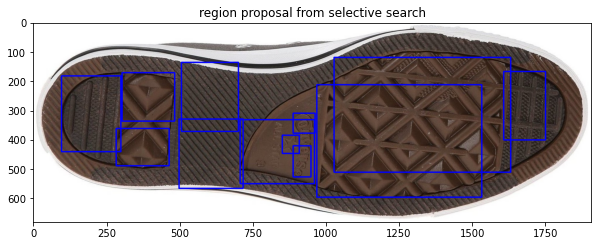

In [36]:
plt.title("region proposal from selective search")
plt.imshow(output)

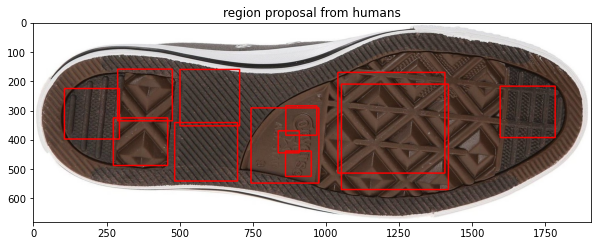

In [37]:
plt.title("region proposal from humans")
plt.imshow(human_image)

In [38]:
# write a function to get all the region proposals

def get_rpn_store(filename,method = "quality"):
    store_path = r"D:\Shoes\Latest_Iteration\Robot_Annotated\\"
    base_path = r"D:\Shoes\Shoes_with_annotations\\"
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    base_path = r"D:\Shoes\Shoes_with_annotations\\"
    filename = filename
    samp_path = base_path + filename
    im = cv2.imread(samp_path)
    ss.setBaseImage(im)
    if method == "fast":
        print(method)
        ss.switchToSelectiveSearchFast()
    if method == "quality":
#         print(method)
        ss.switchToSelectiveSearchQuality()
    rects = ss.process()
    coords = []
    for (x, y, w, h) in rects: 
        xmin, ymin, xmax, ymax = x,y,x+w, y+h
        coords.append([xmin, ymin, xmax, ymax])
    robot_dict = []
    for i in coords:
        human_annotated_dict = {"x1": i[0], "x2": i[2], 
                       "y1": i[1],"y2": i[3]}
        robot_dict.append(human_annotated_dict)
    best_catches = []
    max_value_catch = []
    for i in file_details[["xmin","ymin","xmax","ymax"]].values:
        human_annotated = i
        human_annotated_dict = {"x1": human_annotated[0], "x2": human_annotated[2], 
                       "y1": human_annotated[1],"y2": human_annotated[3]}
        iou_human_vs_robot = [get_iou(n,human_annotated_dict) for i,n in enumerate(robot_dict)]
        max_value = np.max(iou_human_vs_robot)
        max_value_catch.append(max_value)
        best_rpn = robot_dict[np.argmax(iou_human_vs_robot)]
        xmin, ymin, xmax, ymax = best_rpn["x1"], best_rpn["y1"], best_rpn["x2"], best_rpn["y2"]
        obj = [xmin, ymin, xmax, ymax]
        best_catches.append(obj)
    mean_iou = np.mean(max_value_catch)
    counter = 0
    output = im.copy()
    for i1 in range(0, len(best_catches)):
        counter = counter + 1
    # clone the original image so we can draw on it
    
    
    # loop over the current subset of region proposals
        i = best_catches[i1]
    
        xmin = i[0]
        ymin = i[1]
        xmax = i[2]
        ymax = i[3]
    # draw the region proposal bounding box on the image
#     color = [random.randint(0, 255) for j in range(0, 3)]
        cv2.rectangle(output, (xmin, ymin), (xmax, ymax), (0,0,255), 3)
    plt.imsave(store_path + filename,output[:,:,::-1])
    return({"filename":filename, "mean_IOU":mean_iou})

In [39]:
# ious  = get_rpn_store(index)

In [ ]:
ious = Parallel(n_jobs=6, verbose = 10, backend = "threading")(delayed(get_rpn_store)
                                                               (file) for file in file_names)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  7.8min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 10.8min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 13.3min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 17.2min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 21.6min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 26.4min
